### Reducción de dimensionalidad con PCA y t-SNE
Trabajo Práctico Experimental N.°9

Este experimento aplica técnicas de reducción de dimensionalidad sobre un dataset real de alta dimensionalidad para análisis y visualización.

In [47]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#### 1. Carga del dataset
Utilizamos el dataset de cáncer de mama de Wisconsin, disponible en sklearn.

In [48]:
# Cargar el dataset de cáncer de mama
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)

In [49]:
# Convertir la variable objetivo a una serie de pandas
y = pd.Series(data.target, name="Clase")

print("Dimensiones del dataset:", X.shape)
X.head()

Dimensiones del dataset: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 2. Estandarización de los datos
Es fundamental estandarizar los datos antes de aplicar técnicas como PCA.

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 3. Aplicación de PCA
Reducimos a 2 componentes y visualizamos la distribución.

In [51]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### 4. Analisis de los resultados

In [52]:
# Proporcion de varianzar explicada por cada componente
print(f"Varianza explicada para 2 componentes: {pca.explained_variance_ratio_.sum():.2%}")
print("Varianza explicada por cada componente:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Componente {i+1}: {var:.4f}")
# Cargar los componentes principales
components = pd.DataFrame(pca.components_, columns=data.feature_names)
components.head()

Varianza explicada para 2 componentes: 63.24%
Varianza explicada por cada componente:
Componente 1: 0.4427
Componente 2: 0.1897


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


### 5. Visualizacion

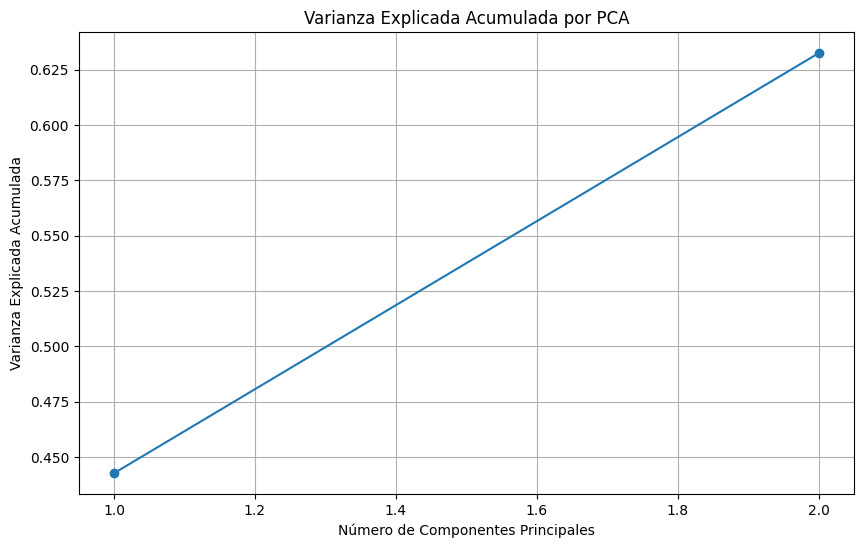

In [53]:
# Grafico de varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()

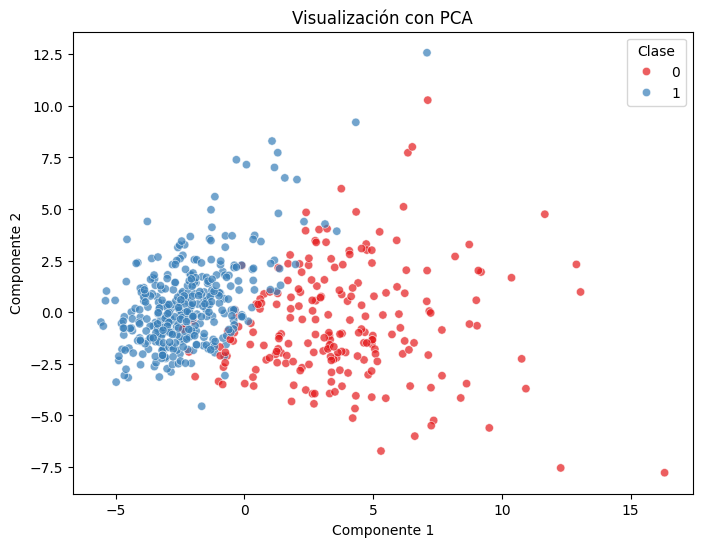

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set1", alpha=0.7)
plt.title("Visualización con PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

### 6. Interpretacion

In [58]:
print("\nCargar los componentes principales:")
print(components)


Cargar los componentes principales:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.218902      0.103725        0.227537   0.220995         0.142590   
1    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.239285        0.258400             0.260854       0.138167   
1          0.151892        0.060165            -0.034768       0.190349   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.064363  ...      0.227997       0.104469         0.236640   
1                0.366575  ...     -0.219866      -0.045467        -0.199878   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.224871          0.127953           0.210096         0.228768   
1   -0.219352          0.172304           0.143593         0.097964   

   worst concave points  worst symmetry  worst fracta

### 6. Aplicación de t-SNE
Usamos t-SNE para comparar visualmente con PCA.

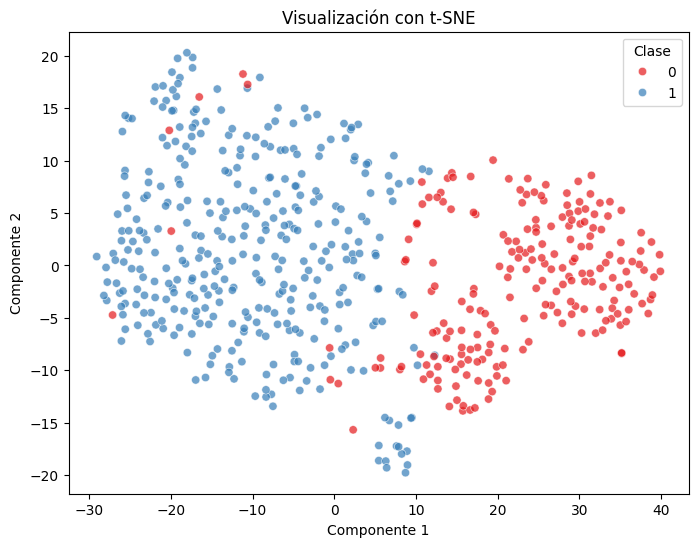

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette="Set1", alpha=0.7)
plt.title("Visualización con t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

#### 7. Comparación de modelos con KNN
Entrenamos un clasificador con datos originales y reducidos.

In [59]:
# Original
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
start = time.time()
knn_orig = KNeighborsClassifier()
knn_orig.fit(X_train, y_train)
pred_orig = knn_orig.predict(X_test)
time_orig = time.time() - start
acc_orig = accuracy_score(y_test, pred_orig)

# PCA
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
start = time.time()
knn_pca = KNeighborsClassifier()
knn_pca.fit(Xpca_train, ypca_train)
pred_pca = knn_pca.predict(Xpca_test)
time_pca = time.time() - start
acc_pca = accuracy_score(ypca_test, pred_pca)

print(f"[Original] Exactitud: {acc_orig:.4f} | Tiempo: {time_orig:.4f} s")
print(f"[PCA] Exactitud: {acc_pca:.4f} | Tiempo: {time_pca:.4f} s")

[Original] Exactitud: 0.9591 | Tiempo: 0.0111 s
[PCA] Exactitud: 0.9591 | Tiempo: 0.0078 s


#### ✅ Preguntas de control

- **¿Cómo cambia el rendimiento con reducción de dimensionalidad?**
  - El rendimiento, en este caso medido por la exactitud, se mantuvo constante (95.91%) tanto con los datos originales como con los datos transformados por PCA. Sin embargo, el tiempo de entrenamiento se redujo ligeramente al usar PCA (de 0.0111 s a 0.0078 s), lo cual puede ser relevante en datasets más grandes. Esto demuestra que PCA puede optimizar el rendimiento computacional sin afectar negativamente la precisión del modelo, al menos en este dataset.

- **¿En qué casos conviene aplicar PCA antes de entrenar un modelo?**
  
  Aplicar PCA es conveniente cuando:

  - El dataset tiene muchas variables y existe riesgo de sobreajuste.

  - Hay correlación entre variables, lo cual puede afectar modelos sensibles a multicolinealidad.

  - Se requiere mejorar la eficiencia computacional, por ejemplo, en problemas en tiempo real o con recursos limitados.

  - Se busca visualizar la estructura interna de los datos en pocas dimensiones.

En este caso, PCA logró explicar el **63.24%** de la varianza con solo 2 componentes, lo que valida su utilidad para reducir la complejidad del problema sin gran pérdida de información.

- **¿Qué ventajas tiene reducir la dimensionalidad cuando se trata de modelos complejos o datos ruidosos?**

Reducir la dimensionalidad ofrece ventajas como:

- Eliminación de ruido, ya que las componentes principales suelen filtrar las características menos relevantes o redundantes.

- Evita el sobreajuste, especialmente en modelos complejos entrenados con pocos datos.

- Facilita la visualización, ayudando a interpretar mejor los datos y patrones de clase.

- Reduce la carga computacional, mejorando la velocidad de entrenamiento y predicción.

En modelos complejos como redes neuronales o SVM, estas ventajas pueden ser críticas para lograr generalización.

### Conclusiones

* La técnica de **reducción de dimensionalidad con PCA** demostró ser eficaz al disminuir el tiempo de entrenamiento del modelo sin sacrificar exactitud, lo cual es especialmente útil en contextos con recursos limitados o donde se requiere eficiencia.
* Con solo **2 componentes principales**, se logró explicar más del **63%** de la varianza del conjunto de datos, lo que indica una gran capacidad de síntesis de PCA.
* Comparado con t-SNE, PCA es más adecuado para reducción con fines de clasificación y entrenamiento rápido, mientras que t-SNE es mejor para **visualización exploratoria**, ya que preserva relaciones locales.
* Se valida que la **reducción de dimensionalidad es una herramienta poderosa** para simplificar datos, mejorar interpretabilidad y acelerar modelos, sin comprometer la calidad predictiva en ciertos casos.

